## $\color{red}{\text{Hypothesis tests}}$
---
- Hypothesis testing is a formal and rigorous way of testing observed claims
  - Most of the time the claims concern population parameters such as mean, median or variance
- Examples of **observed claims**:
  - The newly developed oil will increase mileage by at least 10 miles
  - The newly developed drug is more effective than the old one
  - The new company logo will increase website traffic by at least 2 fold
  - There is no difference between two methods of teaching
- Typically, hypothesis tests falls under two categories: **parametric** and **non-parametric**
  - For **parametric** tests we assume that the claims follow some known probability distribution such as binomial, normal, T, etc.
  - **Non-parametric** tests assumes that the claims do not follow any known probability distribution

## $\color{red}{\text{Elements of hypothesis tests}}$
---
- There are four elements of every hypothesis test: the null hypothesis ($H_0$), alternative hypothesis ($H_1$), the test statistic and rejection region
  - The **null hypothesis** is the current accepted claim until there's overwhelming evidence for the **alternative hypothesis**
  - The **test statistic** is a function used to make a decision on rejecting or not rejecting $H_0$
  - The **rejection region** represent values of the test statistic for which $H_0$ is be rejected in favor of the $H_1$
- The validity of hypothesis tests are often communicated through a **p-value**
  - A **p-value** or **significance level** is the smallest value of $\alpha$ for which the oberserved data indicates that the null hypothesis should be rejected. That is, the smaller the p-value, the more compelling the evidence points to the rejection of the null hypothesis

## $\color{red}{\text{Errors in hypothesis tests}}$
- There are two types of errors in hypthesis testing: **type I** and **type II**
- Type I error is committed if $H_0$ is rejected when it is true. That is, the current cliam is rejected when there's no evidence to support its rejection
  - The probability of committing a type I error is $\alpha$, also called the **significance level**
- Type II error is committed if $H_0$ is accepted when $H_1$ is true. That is, the current claim is accepted when there's evidence to reject it
  - The probability of a type II error is $\beta$

## $\color{red}{\text{Some common parametric tests}}$


### $\color{blue}{\text{The F-test}}$
---
- **Purpose:** To determine if population variances are equal
- **Structure:**
  \begin{equation}
    \begin{array}{l}
      H_0: \sigma^2_{g1} = \sigma^2_{g2} \\
      H_1: \sigma^2_{g1} \neq \sigma^2_{g2}
    \end{array}
  \end{equation}

## $\color{red}{\text{Import Required Packages}}$

In [1]:
import pandas as pd
import numpy as np

## $\color{red}{\text{Import Data}}$

In [2]:
df = pd.read_excel('/Users/dB/Documents/repos/github/bint-capstone/notebooks/data/hrData.xlsx', sheet_name="origData")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dB/Documents/repos/github/bint-capstone/notebooks/data/hrData.xlsx'

In [4]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


#### $\color{green}{\text{Example 1}}$
- What is the variance of `Age` across `Gender`?
- Calculate the variance of age
- Use the F-Test to decide if the results are statistically significant or not

In [6]:
subset = ['Age','Gender']
sub_df = df[subset]
sub_df.head()

,Age,Gender
0,41,Female
1,49,Male
2,37,Male
3,33,Female
4,27,Male


In [ ]:
# group numerical data by categorical vars
grouped = sub_df.groupby("Gender")

# Get variance of age across gender
grp_df = grouped.var()
grp_df

,Age
Gender,
Female,85.860295
Male,81.763719


In [13]:
from scipy.stats import f_oneway
# Separate data by each category
male_age = sub_df[sub_df.Gender == 'Male']['Age']
female_age = sub_df[sub_df.Gender == 'Female']['Age']

f_oneway(male_age, female_age)

F_onewayResult(statistic=1.9380487130268838, pvalue=0.1640914123181884)

### $\color{blue}{\text{Normality tests}}$
---
- Normality tests are conducted to determine whether a sample is drawn from a normal distribution
- Normality tests comes in two flavors: **visual** and **hypothesis tests**




#### $\color{brown}{\text{QQ-Plot}}$
- Visual normality test includes the **QQ-Plots**
  - The **QQ-Plot** calculates the **z-scores** of all data points and orders it from high to low
  - The y-axis corresponds to the z-scores associated with the raw data
  - The x-axis corresponds to the quantile of a theoretical normal distribution
  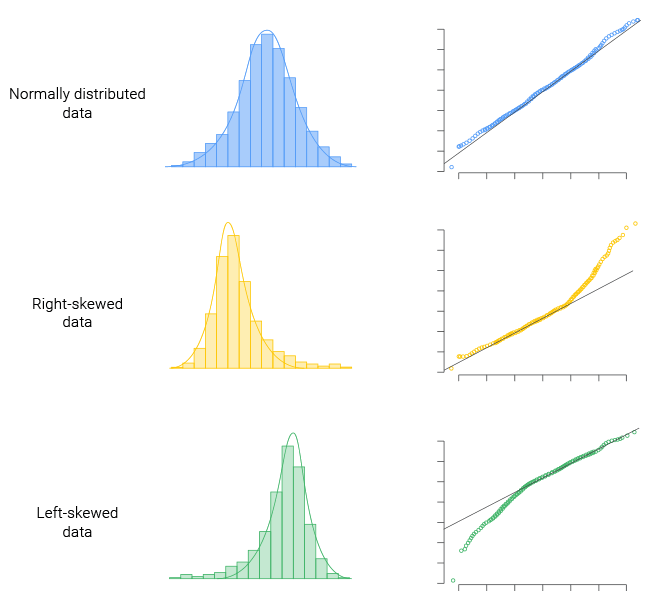

#### $\color{brown}{\text{Formal tests}}$
- Hypothesis tests for normality includes the **Anderson-Darling** test, **K-S** test, **Shapiro-Wilks** tests, etc.
- The structure for the Anderson-Darling test is as follows:
  \begin{equation}
    \begin{array}{l}
      H_0: The \:data \:follows \:a \:normal \:distribution \\
      H_1: The \:data \:does \:NOT \:follows \:a \:normal \:distribution
    \end{array}
  \end{equation}

### $\color{blue}{\text{Student's T-Test}}$
---
- **Purpose**: To determine whether the means of two groups are equal
- **Assumption**: Both groups are sampled from normal distributions with equal variances
- **Structure**: 

$$
\begin{equation}
  \begin{array}{l}
    H_0: \mu_{g1} = \mu_{g2} \\
    H_1: \mu_{g1} \neq \mu_{g2}
  \end{array}
\end{equation}
$$




#### $\color{green}{\text{Example 2}}$
- Provide a QQplot of `age` by `Gender`. What does that tell you?
- Using a statistical test, determine whether the two means are equal or not. Keep in mind the assumptions of the test

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

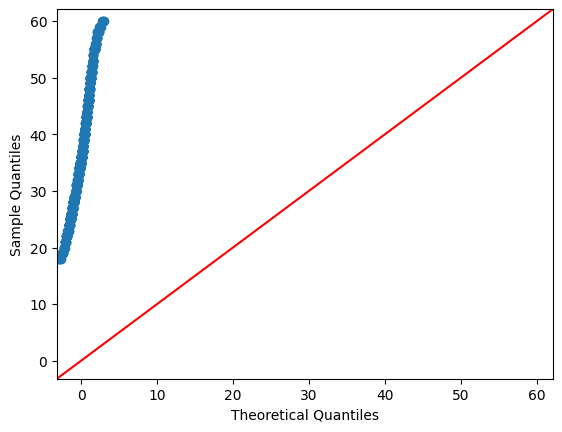

In [22]:
sm.qqplot(
    male_age,
    line='45'
)
plt.show()

From this we know that age is not normally distributed for men.

In [ ]:
from scipy.stats import shapiro # shapiro-wilks test
from scipy import stats
shapiro(sub_df.Age)



0.1640914123181858

In [ ]:
# perform t-test
t_stat, p_val = stats.ttest_ind(male_age, female_age)

p_val

### $\color{blue}{\text{The chi-square test}}$
---
- **Purpose:** To determine if there's correlation among two categorical variables
  - This is sometimes called chi-square test of independence
- **Structure:**
  \begin{equation}
    \begin{array}{l}
      H_0: The \:variables \:are \:independent \:(related) \\
      H_1: The \:variables \:are \:NOT \:independent \:(related)
    \end{array}
  \end{equation}
- **Comment:** There's also a chi-square **goodness-of-fit** test used to determine if the proportions of a categorical variables comes from an expected distribution or not


#### $\color{green}{\text{Example 3}}$
- For the dataset under consideration is there any relationship between `maritalStatus` and `Gender`?
- Use a chi-square test to understand any difference


In [29]:
cols = ['MaritalStatus','Gender']
subset = df[cols]

ct = pd.crosstab(index=df['Gender'], columns=df['MaritalStatus'])
ct

MaritalStatus,Divorced,Married,Single
Gender,,,
Female,117,272,199
Male,210,401,271
